In [1]:
import pandas as pd   #to import the required library of python
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [52]:
df= pd.read_csv('D:\\datascience\\Height-Weight Data.csv') #to command python to read the desired csv data file.

# Explotary Data Analysis

In [53]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [54]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [9]:
df.info

<bound method DataFrame.info of          Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
3496  69.296830  185.649086
3497  70.542201  210.198845
3498  73.912549  202.429960
3499  67.396021  144.277671
3500  72.738970  187.222909

[3501 rows x 2 columns]>

Text(0.5, 1.0, 'Height-Weight Data')

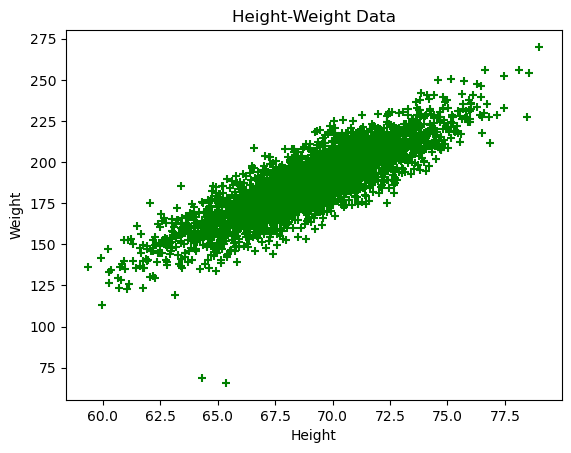

In [11]:
plt.scatter(df.Height,df.Weight, color='green', marker='+') #to draw the scatter plot
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Height-Weight Data')

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression #to import linear regression model

In [13]:
reg= LinearRegression() #to create object for Linear Regression

In [14]:
from sklearn.model_selection import train_test_split as tts #to import splitting data model from library

In [15]:
x =df[['Height']] #to define x and y
y= df[['Weight']]

In [16]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1) #splitting data

In [17]:
xtrain.head() #train value of x

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [19]:
ytrain.head()

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [20]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [21]:
ytest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


In [24]:
reg.fit(xtrain,ytrain) #training model

LinearRegression()

In [25]:
m= reg.coef_        #defining coefficient and intercept
c=reg.intercept_

In [26]:
m    #measuring value of slope

array([[5.9467582]])

In [27]:
c   #measuring value of intercept

array([-223.73384719])

In [28]:
predicted = (m*191.563495) + c #to predict value of y when x is 191.563495
predicted

array([[915.44793702]])

In [29]:
df2= df.copy() #to define another variable

In [30]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [31]:
df2['predicted']= reg.predict(df[['Height']]) #to show the predicted weight for height picked up randomly
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


Text(0.5, 1.0, 'Height-Weight Data')

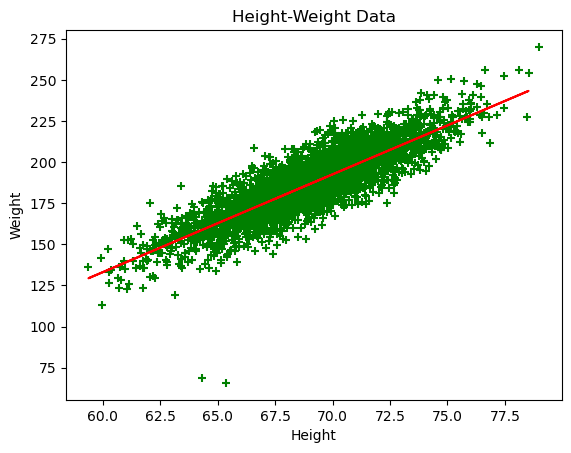

In [32]:
plt.scatter(df[['Height']], df[['Weight']], color='green', marker='+') #to draw best fit line using xtest data
plt.plot(xtest, reg.predict(xtest), color='red')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Height-Weight Data')


Text(0.5, 1.0, 'Height-Weight Data')

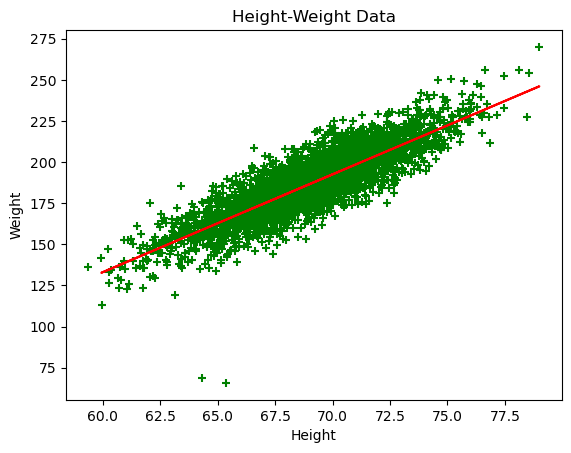

In [33]:
plt.scatter(df[['Height']], df[['Weight']], color='green', marker='+') #to draw best fit line using xtrain data
plt.plot(xtrain, reg.predict(xtrain), color='red')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Height-Weight Data')

In [34]:
from sklearn.metrics import mean_squared_error as MSE   #to import error model from metrics packege under sklearn library 
from sklearn.metrics import mean_absolute_error as MAE

In [35]:
test_mse= MSE(ytest, reg.predict(xtest)) #to measure test MSE
test_mse

111.14654406073981

In [36]:
test_mae= MAE(ytest, reg.predict(xtest)) #to measure test MAE
test_mae

8.294300749436378

In [37]:
train_mse= MSE(ytrain, reg.predict(xtrain)) #to measure training MSE
train_mse

103.48759292384861

In [38]:
train_mae= MAE(ytrain, reg.predict(xtrain)) #to measure training MAE
train_mae

7.95548845242242

In [39]:
df.Height.mean() #to measure the mean of Height

69.02441087268781

In [40]:
df.Weight.mean() #to measure the mean of Weight

186.891257979463